In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Pandas Review

## Set up Pandas default params

In [2]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [3]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)
pd.set_option('display.precision', 3)

In [4]:
## Make a Series
s = pd.Series([1,3,5,np.nan,6,8])  # a missing numerical value is a floating point value in numpy (float64)
# If we didn't use nan, then we would have dtype 'int64'
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

## Load a data set -- read_*

### "Census Income" dataset

http://archive.ics.uci.edu/ml/

In [5]:
# See http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

# download the data and name the columns
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
        'marital_status', 'occupation', 'relationship', 'ethnicity',
        'gender', 'capital_gain', 'capital_loss', 'hours_per_week',
        'country_of_origin', 'income']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                       names = cols)   # giving the column names manually , i.e., define our own names

**Q: What's happening in the above cell?**

## Viewing Data

* .info() 
* .head()
* .tail()
* .columns
* .values
* .dtype

In [6]:
# df.head()
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education_num',
       u'marital_status', u'occupation', u'relationship', u'ethnicity',
       u'gender', u'capital_gain', u'capital_loss', u'hours_per_week',
       u'country_of_origin', u'income'],
      dtype='object')

In [7]:
df.values  # this is showing what's in each row of the data

array([[39, ' State-gov', 77516, ..., 40, ' United-States', ' <=50K'],
       [50, ' Self-emp-not-inc', 83311, ..., 13, ' United-States', ' <=50K'],
       [38, ' Private', 215646, ..., 40, ' United-States', ' <=50K'],
       ..., 
       [58, ' Private', 151910, ..., 40, ' United-States', ' <=50K'],
       [22, ' Private', 201490, ..., 20, ' United-States', ' <=50K'],
       [52, ' Self-emp-inc', 287927, ..., 40, ' United-States', ' >50K']], dtype=object)

### info

Displays the Columns, Types, Rows and the memory used by the dataframe

In [8]:
# We can see there are no null values.
# Columns with numerical values are type int64, no need to set data type.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                  32561 non-null int64
workclass            32561 non-null object
fnlwgt               32561 non-null int64
education            32561 non-null object
education_num        32561 non-null int64
marital_status       32561 non-null object
occupation           32561 non-null object
relationship         32561 non-null object
ethnicity            32561 non-null object
gender               32561 non-null object
capital_gain         32561 non-null int64
capital_loss         32561 non-null int64
hours_per_week       32561 non-null int64
country_of_origin    32561 non-null object
income               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Head

Displays the first few rows in the dataframe

In [9]:
# to view the first 5 or specify with ex: .head(10)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Tail

Displays the last few rows in the dataframe

In [10]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Sample

Displays a Sample of rows in the dataframe

In [12]:
# head and tail are good.  But sometimes we want to randomly sample data
df.sample(5, random_state=42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,<=50K


### Columns

Returns a List of Columns in the dataframe

In [13]:
# view all columns of the dataframe
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education_num',
       u'marital_status', u'occupation', u'relationship', u'ethnicity',
       u'gender', u'capital_gain', u'capital_loss', u'hours_per_week',
       u'country_of_origin', u'income'],
      dtype='object')

### Column Types

Returns the type of each column

In [14]:
df.dtypes

age                   int64
workclass            object
fnlwgt                int64
education            object
education_num         int64
marital_status       object
occupation           object
relationship         object
ethnicity            object
gender               object
capital_gain          int64
capital_loss          int64
hours_per_week        int64
country_of_origin    object
income               object
dtype: object

## Rename columns

In [15]:
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education_num',
       u'marital_status', u'occupation', u'relationship', u'ethnicity',
       u'gender', u'capital_gain', u'capital_loss', u'hours_per_week',
       u'country_of_origin', u'income'],
      dtype='object')

In [16]:
# replace a column name
df.rename(columns = {'country_of_origin' : 'native_country'}, inplace = True)  
# country_of_origin has now been re-named to native country
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Descriptives 

* .describe()
* .value_counts()
* .mean()
* .unique()

### Describe

Displays summary statistic for each Numerical column

In [17]:
df.describe()  # gives us distributions of the numerical values

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000,3.256e+04,32561.000,32561.000,32561.000,32561.000
mean,38.582,1.898e+05,10.081,1077.649,87.304,40.437
std,13.640,1.055e+05,2.573,7385.292,402.960,12.347
min,17.000,1.228e+04,1.000,0.000,0.000,1.000
25%,28.000,1.178e+05,9.000,0.000,0.000,40.000
50%,37.000,1.784e+05,10.000,0.000,0.000,40.000
75%,48.000,2.371e+05,12.000,0.000,0.000,45.000
max,90.000,1.485e+06,16.000,99999.000,4356.000,99.000


### value_counts

Counts the number of occurances of each categorical value for the column

In [18]:
df.education.value_counts()  # gives us frequency distributions for categorial values (e.g., education)

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
                 ...  
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

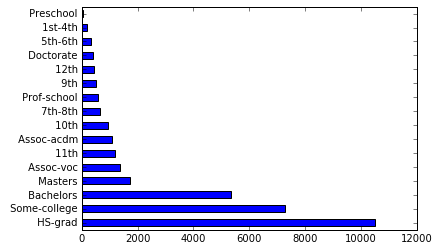

In [19]:
df.education.value_counts().plot('barh')   # gives a bar plot which shows magnitude difference in values
# x axis is always a numerical value

In [20]:
df.hours_per_week.mean()

40.437455852092995

In [21]:
df[['age', 'capital_gain', 'capital_loss', 'hours_per_week']].describe()

,age,capital_gain,capital_loss,hours_per_week
count,32561.000,32561.000,32561.000,32561.000
mean,38.582,1077.649,87.304,40.437
std,13.640,7385.292,402.960,12.347
min,17.000,0.000,0.000,1.000
25%,28.000,0.000,0.000,40.000
50%,37.000,0.000,0.000,40.000
75%,48.000,0.000,0.000,45.000
max,90.000,99999.000,4356.000,99.000


### Unique

Returns the unique values for the column

In [22]:
# There's a space before each string in this data
df.education.unique()  # this is numpy's unique function

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [23]:
# looks like it's in every object column
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object)

In [24]:
df["education"] = df.education.str.strip()  # we need to clean up the values by stripping the leading and trailing
                                            # spaces

In [25]:
# Hurray We removed the leading space
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
ethnicity         32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Exercise - Now, can you remove the leading space for all String Columns

In [27]:
# Your Turn
df.marital_status.unique()
df["marital_status"] = df.marital_status.str.strip()
df.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed'], dtype=object)

In [28]:
for column in df.columns:
    if df[column].dtype=="O":
        # Strip the column of the leading space
        df[column]=df[column].str.strip()

In [29]:
df.head()
# print(df.head())

   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship ethnicity  gender  \
0       Never-married       Adm-clerical  Not-in-family     White    Male   
1  Married-civ-spouse    Exec-managerial        Husband     White    Male   
2            Divorced  Handlers-cleaners  Not-in-family     White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband     Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife     Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0         

## plotting with pandas

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

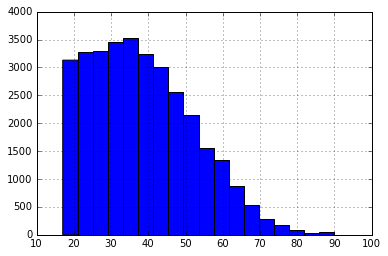

In [32]:
df.age.hist(bins = 18);   # histogram (defaults is 10 bins) -- distribution of age in data sets

# Signature: df.age.hist(by=None, ax=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, 
# figsize=None, bins=10, **kwds)
#
# Docstring:
# Draw histogram of the input series using matplotlib
# 
# Parameters
# ----------
# by : object, optional
#    If passed, then used to form histograms for separate groups
# ax : matplotlib axis object
#    If not passed, uses gca()
# grid : boolean, default True
#     Whether to show axis grid lines
# xlabelsize : int, default None
#     If specified changes the x-axis label size
# xrot : float, default None
#     rotation of x axis labels
# ylabelsize : int, default None
#     If specified changes the y-axis label size
# yrot : float, default None
#     rotation of y axis labels
# figsize : tuple, default None
#     figure size in inches by default
# bins: integer, default 10
#     Number of histogram bins to be used
# kwds : keywords
#    To be passed to the actual plotting function


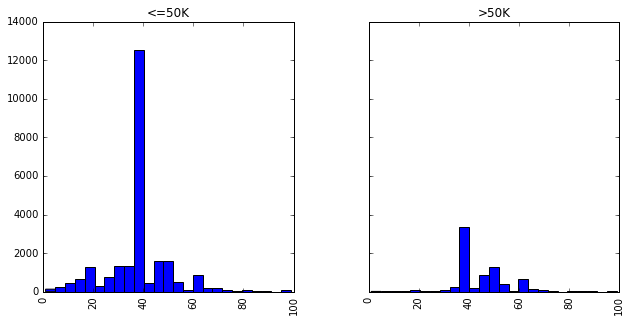

In [33]:
# split the histograms by another column (with relatively few unique values)
df.hours_per_week.hist(by = df.income, sharey = True, bins = 25, figsize = (10,5));
# ax = df.hours_per_week.hist(by = df.income, sharey = True, bins = 25, figsize = (10,5))
# ax[0].set_xlabel['Hours Per Week']
# ax[1].set_ylabel['Number of People']
# break down into multiple plots; make sure to set sharey to True here or it might seem deceptive

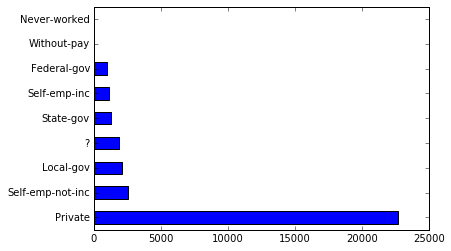

In [44]:
# use value_counts() and a bar plot
df['workclass'].value_counts().plot(kind = 'barh')

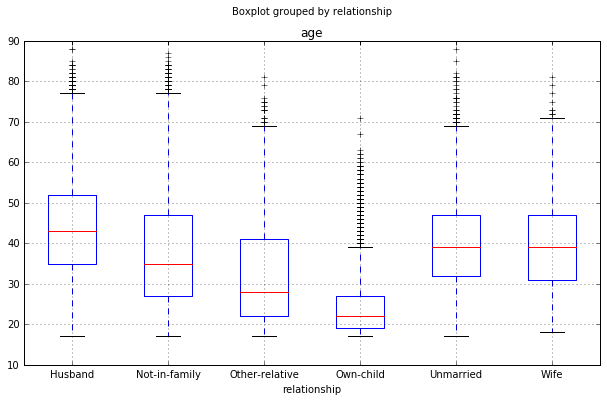

In [34]:
df.boxplot(['age'], by = 'relationship', figsize=(10, 6));

# Signature: df.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, 
#                      return_type=None, **kwds)
# Docstring:
# Make a box plot from DataFrame column optionally grouped by some columns or
# other inputs
#
# Parameters
# ----------
# data : the pandas object holding the data
# column : column name or list of names, or vector
#    Can be any valid input to groupby
# by : string or sequence
#     Column in the DataFrame to group by
# ax : Matplotlib axes object, optional
# fontsize : int or string
# rot : label rotation angle
# figsize : A tuple (width, height) in inches
# grid : Setting this to True will show the grid
# layout : tuple (optional)
#    (rows, columns) for the layout of the plot
# return_type : {'axes', 'dict', 'both'}, default 'dict'
#    The kind of object to return. 'dict' returns a dictionary
#    whose values are the matplotlib Lines of the boxplot;
#    'axes' returns the matplotlib axes the boxplot is drawn on;
#    'both' returns a namedtuple with the axes and dict.
#
#    When grouping with ``by``, a dict mapping columns to ``return_type``
#    is returned.
#
# kwds : other plotting keyword arguments to be passed to matplotlib boxplot
#       function

# Returns
# -------
# lines : dict
# ax : matplotlib Axes
# (ax, lines): namedtuple


In [35]:
def compute_values(x,y):
    return x*y, x*y

In [36]:
a, b = compute_values(5,3)

In [37]:
print(a)
print(b)

15
15


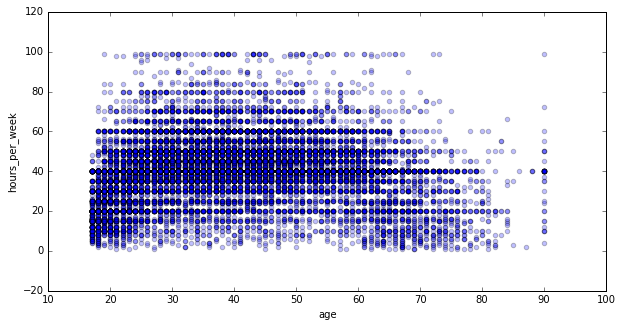

In [51]:
fig, ax = plt.subplots(1,1, figsize = (10,5))   # we're creating a canvas here 
df.plot.scatter(
        x = 'age',
        y ='hours_per_week',
        alpha = .25,
        ax = ax
        )
# Signature: df.plot.scatter(x, y, s=None, c=None, **kwds)
# Docstring:
# Scatter plot

# Parameters
# ----------
# x, y : label or position, optional
#     Coordinates for each point.
# s : scalar or array_like, optional
#     Size of each point.
# c : label or position, optional
#     Color of each point.
# **kwds : optional
#     Keyword arguments to pass on to :py:meth:`pandas.DataFrame.plot`.

# Returns
-------
# axes : matplotlib.AxesSubplot or np.array of them

## Selecting rows and columns 

### .loc 

* Selects row and columns by Names
* **by label**             `.loc[]`

### .iloc

* Selects row and columns by Index Position
* **by integer position**  `.iloc[]`


### .ix

* Redirects to `loc` or `iloc` based on input
* **for both**             `.ix[]`

http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [38]:
# select a row
df.iloc[0:3]  # we want row 0 to 3

# Docstring:
# Purely integer-location based indexing for selection by position.
#
# ``.iloc[]`` is primarily integer position based (from ``0`` to
# ``length-1`` of the axis), but may also be used with a boolean
# array.
#
# Allowed inputs are:
#
# - An integer, e.g. ``5``.
# - A list or array of integers, e.g. ``[4, 3, 0]``.
# - A slice object with ints, e.g. ``1:7``.
# - A boolean array.
# - A ``callable`` function with one argument (the calling Series, DataFrame
#   or Panel) and that returns valid output for indexing (one of the above)
#
# ``.iloc`` will raise ``IndexError`` if a requested indexer is
# out-of-bounds, except *slice* indexers which allow out-of-bounds
# indexing (this conforms with python/numpy *slice* semantics).

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [39]:
# select a range of rows
df.iloc[10:15]   # this is the same syntax for indexing a list

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


In [40]:
# last 2 rows
df.iloc[-2:]
# df.iloc[-20:-18]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [41]:
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education_num',
       u'marital_status', u'occupation', u'relationship', u'ethnicity',
       u'gender', u'capital_gain', u'capital_loss', u'hours_per_week',
       u'native_country', u'income'],
      dtype='object')

In [42]:
# selecting every other row in columns 3-5
df.iloc[::2, 2:5].head()

,fnlwgt,education,education_num
0,77516,Bachelors,13
2,215646,HS-grad,9
4,338409,Bachelors,13
6,160187,9th,5
8,45781,Masters,14


In [43]:
# select the first 4 rows
df.loc[0:3]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [45]:
df.loc[0:2, ['age', 'relationship']]

,age,relationship
0,39,Not-in-family
1,50,Husband
2,38,Not-in-family


In [46]:
df.ix[0:2, ['age', 'relationship']]   # could get an error (?) because this is a string of the column name
# Redirects to loc or iloc based on input
# for both  .ix[]

# Docstring:
# A primarily label-location based indexer, with integer position
# fallback.
#
# ``.ix[]`` supports mixed integer and label based access. It is
# primarily label based, but will fall back to integer positional
# access unless the corresponding axis is of integer type.

# ``.ix`` is the most general indexer and will support any of the
# inputs in ``.loc`` and ``.iloc``. ``.ix`` also supports floating
# point label schemes. ``.ix`` is exceptionally useful when dealing
# with mixed positional and label based hierachical indexes.
#
# However, when an axis is integer based, ONLY label based access
# and not positional access is supported. Thus, in such cases, it's
# usually better to be explicit and use ``.iloc`` or ``.loc``.

,age,relationship
0,39,Not-in-family
1,50,Husband
2,38,Not-in-family


In [47]:
df.ix[0:2, 'age':'relationship']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family


## Selection - Exercise

In [49]:
# pd.DataFrame let's you turn series, arrays, lists, and more into data frame structures
# a 4-column data frame
df_index = pd.DataFrame([[1,2,3,4],[2,4,6,8],[3,5,7,9]], index=[11,13,12], columns = ['A', 'C', 'D', 'B'])

In [50]:
df_index

,A,C,D,B
11,1,2,3,4
13,2,4,6,8
12,3,5,7,9


In [51]:
# iloc indexes by postion, not by the labels in the index
df_index.iloc[0:1]

,A,C,D,B
11,1,2,3,4


In [52]:
# with loc both the start and the stop are included
df_index.loc[11:12]  # each row has an index on it

,A,C,D,B
11,1,2,3,4
13,2,4,6,8
12,3,5,7,9


In [53]:
# select columns by position
df_index.iloc[:,0:1]  # give me all rows and columns 0 to 1

,A
11,1
13,2
12,3


In [54]:
# or by label
df_index.loc[:,'A':'D']  # give me all rows 

,A,C,D
11,1,2,3
13,2,4,6
12,3,5,7


In [55]:
# ix: primarily label based, but will fall back to integer positional access
df_index.ix[:,'A':'C']

,A,C
11,1,2
13,2,4
12,3,5


In [56]:
# ix: primarily label based, but will fall back to integer positional access
df_index.ix[:,0:2]

,A,C
11,1,2
13,2,4
12,3,5


## Filtering

In [57]:
df.age > 50

0        False
1        False
2        False
3         True
4        False
5        False
6        False
         ...  
32554     True
32555    False
32556    False
32557    False
32558     True
32559    False
32560     True
Name: age, dtype: bool

In [58]:
df[df.age > 50]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
41,53,Self-emp-not-inc,88506,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K


In [59]:
# Filter for only certain Columns
df.loc[df.age > 50, ['age', 'education', 'occupation', 'gender', 'income']]  # row range , column range

,age,education,occupation,gender,income
3,53,11th,Handlers-cleaners,Male,<=50K
7,52,HS-grad,Exec-managerial,Male,>50K
21,54,HS-grad,Other-service,Female,<=50K
24,59,HS-grad,Tech-support,Female,<=50K
25,56,Bachelors,Tech-support,Male,>50K
27,54,Some-college,?,Male,>50K
41,53,Bachelors,Prof-specialty,Male,<=50K
...,...,...,...,...,...
32533,54,Bachelors,Exec-managerial,Male,>50K
32539,71,Doctorate,?,Male,>50K


## Now Filter on Gender

In [60]:
## Your Turn
df.head()
df.gender=='Male'
df[df.gender=='Male']  # this seems correct
df[df.gender=='Female']  # this seems correct
df.loc[df.gender == 'Female', ['age', 'education', 'occupation', 'gender', 'income']]  # row range , column range
# can combine these different expressions

,age,education,occupation,gender,income
4,28,Bachelors,Prof-specialty,Female,<=50K
5,37,Masters,Exec-managerial,Female,<=50K
6,49,9th,Other-service,Female,<=50K
8,31,Masters,Prof-specialty,Female,>50K
12,23,Bachelors,Adm-clerical,Female,<=50K
19,43,Masters,Exec-managerial,Female,>50K
21,54,HS-grad,Other-service,Female,<=50K
...,...,...,...,...,...
32544,31,Masters,Other-service,Female,<=50K
32545,39,Assoc-acdm,Adm-clerical,Female,>50K


## Now Filter on Gender and Age between 30 and 40

In [61]:
## Your Turn -- This is just an exaple
df[(df.gender=='Male') & (df.age>30) & (df.age<40)]   # notice we use '&' here instead of 'and'

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
17,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
18,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K
32517,36,Private,131459,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


## Sorting DataFrame

## Sorting DataFrame

* **sort_index()** to sort by index
* **sort_values()** to sort by values

##### sort( ) is going to be deprecated, so you should try to use sort_index() or sort_values() as much as possible

In [90]:
# Sort by Age
df.sort_values("age")

# Signature: df.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
# Docstring:
# Sort by the values along either axis
#
# Parameters
# ----------
# by : string name or list of names which refer to the axis items
# axis : index, columns to direct sorting
# ascending : bool or list of bool
#     Sort ascending vs. descending. Specify list for multiple sort
#     orders.  If this is a list of bools, must match the length of
#     the by.
# inplace : bool
#     if True, perform operation in-place
# kind : {`quicksort`, `mergesort`, `heapsort`}
#     Choice of sorting algorithm. See also ndarray.np.sort for more
#     information.  `mergesort` is the only stable algorithm. For
#     DataFrames, this option is only applied when sorting on a single
#     column or label.
# na_position : {'first', 'last'}
#     `first` puts NaNs at the beginning, `last` puts NaNs at the end

# Returns
# -------
# sorted_obj : DataFrame


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income
12318,17,Private,127366,11th,7,Never-married,Sales,Own-child,White,Female,0,0,8,United-States,<=50K
6312,17,Private,132755,11th,7,Never-married,Sales,Own-child,White,Male,0,0,15,United-States,<=50K
30927,17,Private,108470,11th,7,Never-married,Other-service,Own-child,Black,Male,0,0,17,United-States,<=50K
12787,17,Local-gov,308901,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States,<=50K
25755,17,?,47407,11th,7,Never-married,?,Own-child,White,Male,0,0,10,United-States,<=50K
14475,17,Private,222618,11th,7,Never-married,Sales,Own-child,Black,Female,0,0,30,United-States,<=50K
23394,17,Private,166242,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11996,90,Private,40388,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
15892,90,Private,88991,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,England,>50K


## Pivot Table

* Excel Style Pivot Table

In [64]:
df.pivot_table?
# Docstring:
# Create a spreadsheet-style pivot table as a DataFrame. The levels in the
# pivot table will be stored in MultiIndex objects (hierarchical indexes) on
# the index and columns of the result DataFrame

In [67]:
# Pivot by Education on rows, workclass on columns and value = hours per week
print(df.head())
df.pivot_table("hours_per_week", "education", "workclass", aggfunc='median', fill_value='')

   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship ethnicity  gender  \
0       Never-married       Adm-clerical  Not-in-family     White    Male   
1  Married-civ-spouse    Exec-managerial        Husband     White    Male   
2            Divorced  Handlers-cleaners  Not-in-family     White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband     Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife     Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0         

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
education,,,,,,,,,
10th,38.0,40,40.0,35,40,40,40,40.0,
11th,35.0,40,35.0,10,40,40,40,40.0,
12th,40.0,40,40.0,,40,40,40,40.0,
1st-4th,40.0,,36.0,,40,40,35,20.0,
5th-6th,40.0,40,40.0,,40,40,40,37.5,
7th-8th,40.0,35,40.0,35,40,45,40,37.5,50
9th,40.0,40,40.0,,40,42,40,40.0,
...,...,...,...,...,...,...,...,...,...
Bachelors,36.0,40,40.0,,40,50,45,40.0,


## Groupby

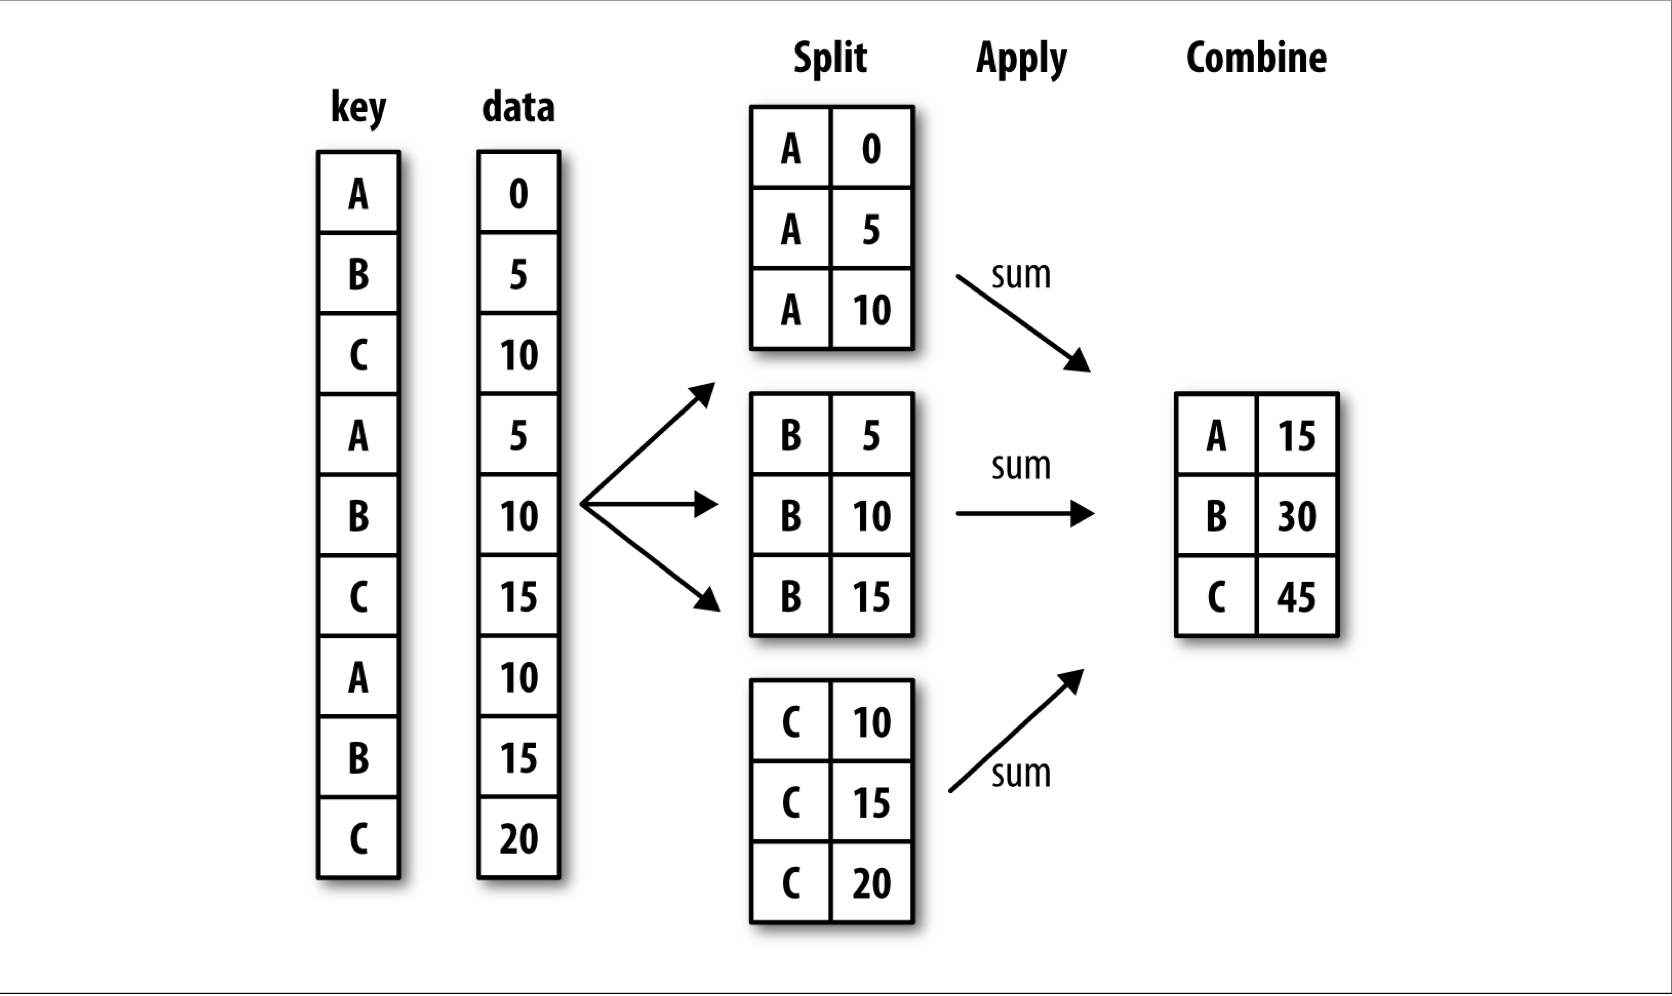

In [65]:
# Ref: Python for Data Analysis by Wes McKinney

Image(filename='../images/wesm_book_groupby.png')

In [66]:
# How to groupby column and apply a function like sum, count, or mean
print(df.head())
df.groupby(['education']).mean()

   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship ethnicity  gender  \
0       Never-married       Adm-clerical  Not-in-family     White    Male   
1  Married-civ-spouse    Exec-managerial        Husband     White    Male   
2            Divorced  Handlers-cleaners  Not-in-family     White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband     Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife     Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0         

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
education,,,,,,
10th,37.430,196832.465,6.0,404.574,56.846,37.053
11th,32.356,194928.077,7.0,215.098,50.079,33.926
12th,32.000,199097.508,8.0,284.088,32.337,35.781
1st-4th,46.143,239303.000,2.0,125.875,48.327,38.256
5th-6th,42.886,232448.333,3.0,176.021,68.252,38.898
7th-8th,48.446,188079.172,4.0,233.940,65.669,39.367
9th,41.060,202485.066,5.0,342.089,28.998,38.045
...,...,...,...,...,...,...
Bachelors,38.905,188055.915,13.0,1756.300,118.350,42.614


In [68]:
df.groupby(['education','age'])[['hours_per_week','capital_gain']].mean()  # quite powerful

hours_per_week  capital_gain
education    age                              
10th         17           21.543       266.659
             18           27.895         0.000
             19           34.500         0.000
             20           39.400         0.000
             21           39.000       229.882
             22           37.053         0.000
             23           42.588         0.000
...                          ...           ...
Some-college 79           20.000         0.000
             80           40.000         0.000
             81           13.000         0.000
             82           11.500         0.000
             84           35.000         0.000
             88           40.000         0.000
             90           32.833         0.000

[965 rows x 2 columns]

In [96]:
# To groupby multiple columns with multiple functions attached, i.e., to use your own aggregation functions, pass
# any function that aggregates an array to the 'agg' method:
df.groupby(['income', 'native_country']).age.agg(['count', 'mean'])
# grouped in order of which column is listed first


count    mean
income native_country                   
<=50K  ?                     437  36.854
       Cambodia               12  35.667
       Canada                 82  41.012
       China                  55  41.800
       Columbia               57  39.228
       Cuba                   70  47.286
       Dominican-Republic     68  37.941
...                          ...     ...
>50K   South                  16  44.875
       Taiwan                 20  40.800
       Thailand                3  32.667
       Trinadad&Tobago         2  42.500
       United-States        7171  44.297
       Vietnam                 5  35.400
       Yugoslavia              6  40.167

[82 rows x 2 columns]

## Reset Index

In [69]:
(df
 .groupby(['income','gender'])  # select income and gender
 .mean()
 .reset_index()
)
# DataFrame.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
# For DataFrame with multi-level index, return new DataFrame with labeling information in the columns under the index 
# names, defaulting to ‘level_0’, ‘level_1’, etc. if any are None. For a standard index, the index name will be used 
# (if set), otherwise a default ‘index’ or ‘level_0’ (if ‘index’ is already taken) will be used.
# See http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html for more info.

,income,gender,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,<=50K,Female,36.211,185999.381,9.820,121.986,47.364,35.917
1,<=50K,Male,37.147,193093.609,9.452,165.724,56.807,40.694
2,>50K,Female,42.126,183687.406,11.787,4200.389,173.649,40.427
3,>50K,Male,44.626,188769.101,11.581,3971.766,198.780,46.366


## Combining Filter and Group

In [74]:
# Get Mean hours per week by Education where Country = 'United-States
## Code goes here  -- work on these later
(df[df.native_country == 'United-States']
 .groupby('education')  # select income and gender
 .mean()
 .reset_index()
)
# df.loc[df.gender == 'Female', ['age', 'education', 'occupation', 'gender', 'income']]  # row range , column range

,education,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,10th,37.513,194471.527,6.0,442.645,60.212,36.915
1,11th,32.492,194964.370,7.0,192.309,50.298,33.682
2,12th,31.222,195390.488,8.0,304.668,33.299,34.951
3,1st-4th,58.391,199942.630,2.0,0.000,85.087,32.913
4,5th-6th,54.608,188733.680,3.0,214.433,146.784,36.979
5,7th-8th,50.838,175449.206,4.0,241.238,59.894,39.060
6,9th,42.785,189192.772,5.0,415.433,29.203,38.035
...,...,...,...,...,...,...,...
9,Bachelors,38.858,186680.981,13.0,1811.347,119.636,42.709
10,Doctorate,48.143,184156.244,16.0,5421.616,283.701,47.409


## Combining it all together - Group, Aggregation, Sort

In [75]:
# groupby income and country and then sort by their mean age within each data block
df_grouped = df.groupby(['income','native_country']).mean().sort_values('age', ascending = True)
df_grouped

# Note: In this example, the groupby, mean, and sort functions are stringed together in one line
# in the next example, we will show a different syntax so that you could write them on separate
# lines to make the code a little easier to read

age      fnlwgt  education_num  capital_gain  \
income native_country                                                        
<=50K  Taiwan              29.323  181981.290         12.548        71.032   
>50K   Dominican-Republic  30.500  220226.000          9.000     49999.500   
       Hong                31.500  294478.833         13.833         0.000   
<=50K  Holand-Netherlands  32.000   27882.000         10.000         0.000   
       Guatemala           32.262  266016.016          5.951       116.148   
       El-Salvador         32.649  264114.124          6.340       190.773   
>50K   Thailand            32.667  199784.000         12.667         0.000   
...                           ...         ...            ...           ...   
       El-Salvador         50.111  149620.556         12.222      4708.111   
       Greece              50.250  121954.125         11.125      3741.250   
       Italy               50.360  185383.360         10.960      1253.040   
       Poland              50.583  179314.167         11.083      2743.083   
       Scotland            52.667  208306.667         10.667      1726.000   
       Columbia            53.500  283410.500         15.500         0.000   
       Hungary             57.333  172137.333         11.000      1726.000   

                           capital_loss  hours_per_week  
income native_country                                    
<=50K  Taiwan                    51.677          33.774  
>50K   Dominican-Republic         0.000          47.000  
       Hong                     329.500          45.000  
<=50K  Holand-Netherlands      2205.000          40.000  
       Guatemala                 26.131          39.361  
       El-Salvador               34.000          36.031  
>50K   Thailand                   0.000          58.333  
...                                 ...             ...  
       El-Salvador                0.000          45.000  
       Greece                   539.625          50.625  
       Italy                     79.080          45.400  
       Poland                     0.000          39.000  
       Scotland                   0.000          46.667  
       Columbia                   0.000          50.000  
       Hungary                    0.000          50.000  

[82 rows x 6 columns]

In [76]:
# We want to group people by their income and country
# Then sort them by their income ASCE, and then sort by average age within that group DESC 
(df
 .groupby(['income','native_country'])
 .mean()
 .reset_index()
 .sort_values(['income','age'], ascending=[True,False])
)

# Note: In this example, we sort by the SAME column which we grouped by earlier 
# (eg. we first groupby 'income' and then sort by 'income')
# In this case, we must use .reset_index() to re-index the groupby objects, because the 'income' 
# column no longer exists after the groupby and hence cannot be sorted directly

,income,native_country,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
5,<=50K,Cuba,47.286,243906.229,9.043,136.986,19.714,37.986
18,<=50K,Hungary,47.000,182993.800,10.700,413.800,166.800,31.300
12,<=50K,Greece,44.667,151661.286,9.190,347.762,202.429,41.810
22,<=50K,Italy,44.375,179759.375,7.750,277.375,0.000,39.625
3,<=50K,China,41.800,175689.182,10.309,103.891,94.418,37.382
31,<=50K,Poland,41.250,185051.479,9.854,169.583,42.729,38.167
38,<=50K,Trinadad&Tobago,41.176,218778.941,8.412,0.000,137.588,37.059
...,...,...,...,...,...,...,...,...
55,>50K,Guatemala,35.667,247825.667,7.667,2562.667,0.000,36.667
80,>50K,Vietnam,35.400,141648.400,9.600,5873.600,0.000,39.200


## Dealing with Missing Data
* Find nulls
* Fill nulls
* Drop nulls

## Find Nulls

In [77]:
# as we saw with df.info() there are no nulls... 
# but if there were this would find the rows where age is null
df[df.age.isnull()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,native_country,income


## Fill nulls

In [78]:
null_df = pd.DataFrame([1,2,4,np.nan], columns = ['column1'])

In [79]:
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [80]:
# you can also fill nulls with a value or string
null_df.column1.fillna(1000)   # fill nan values with specific values

0       1.0
1       2.0
2       4.0
3    1000.0
Name: column1, dtype: float64

In [85]:
# fillna does not do it inplace unless you specify
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [87]:
# you can also fill null with the median or mean value of the column
null_df.fillna(null_df.column1.median())

,column1
0,1.0
1,2.0
2,4.0
3,2.0


In [88]:
null_df.fillna('random_string')

,column1
0,1
1,2
2,4
3,random_string


## Drop nulls

In [89]:
null_df = pd.DataFrame([1,2,4,np.nan], columns = ['column1'])

In [90]:
null_df

,column1
0,1.0
1,2.0
2,4.0
3,NaN


In [91]:
null_df.dropna(how = 'any')

,column1
0,1.0
1,2.0
2,4.0


In [92]:
# .isnull() and .notnull() does opposite things
null_df.isnull()   # giving us a boolean index of True and False

,column1
0,False
1,False
2,False
3,True


In [93]:
null_df.notnull()

,column1
0,True
1,True
2,True
3,False


## Practice Exercises

In [ ]:
# how many males and females are in this data set -- we'll leave this as homework exercises

In [ ]:
# plot the total number of people in each occupation

In [ ]:
# what is the lowest average age of an occupation

In [ ]:
# create a boxplot of hours per week by education level

In [ ]:
# create a new column for income where >50K = 1 and <=50K = 0

# hint... http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html

In [ ]:
# find which "native_country" has the highest percent of people earning >50K

In [ ]:
# visualize what percent of people earn over 50K by education level